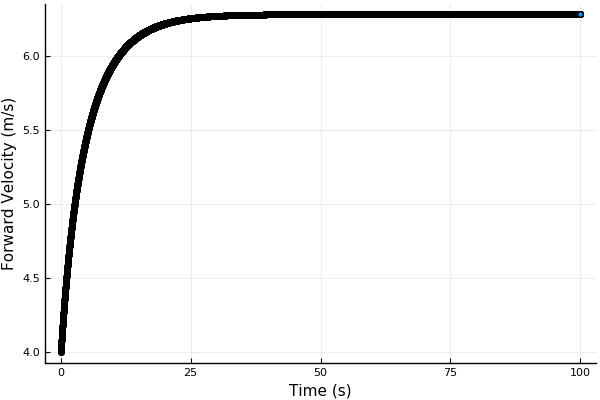

In [105]:
#simulation of bicycle velocity with linear and quadratic drag
using Plots
pyplot()
plt = plot()

t = Float64[0.0] 
v = Float64[4.0] #initial velocity of 4 m/s

P  = 400.0 #power of cyclist in W
F  = P/7.0 #inital force when starting from rest
m  = 70.0  #mass of cyclist in kg
h  = 1.5   #height of bicycle + rider in m
θ  = 5*(π/180) #angle of ascent
g  = 9.81  #acceleration due to gravity
C  = 0.5   #drag coefficient
A  = 0.33  #crossectional area of bike + rider in m^2
ρ  = 1.225 #density of air in kg/m^3
η  = 2e-5  #viscosity of air in Pa*s
Δt = 0.01   #timestep in seconds
N  = 10000 #number of timesteps

function v_next(v)
    P_ascent = v*m*g*sin(atan(θ))
    if F*v < P - P_ascent
        v + (F/m)*Δt
    else
        v + (((P - P_ascent)/(m*v)) - (η*A*v)/h - (C*ρ*A*v^2)/(2*m))*Δt
    end
end

for i = 0:N
    push!(t, t[end] + Δt)
    push!(v, v_next(v[end]))
end


scatter!(plt, t, v, legend=:none)
xlabel!("Time (s)")
ylabel!("Forward Velocity (m/s)")

